# EDA - Gas Prices in Brazil 2004-2019 Dataset

## Modelagem Estatística Avançada

## Professor:

- Prof. Rodrigo Togneri

## Alunos:

- Ricardo Lucio Braga Reis – A57590919
- Marcio Thiago Eggers – A57523795
- Flávio Santos Freire – A57588090

Importando bibliotecas necessárias:

In [93]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import numpy as np

## Introdução

A ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis) disponibiliza regularmente a série histórica de preços e margens da comercialização de combustíveis semanal, mensal e anual, classificados por região e estado, englobando os seguintes combustíveis:

- Gasolina Comum
- Etanol Hidratado
- Óleo Diesel Não Aditivado
- Gás Natural Veicular (GNV)
- Gás Liquefeito de Petróleo (GLP – botijão de 13 quilos)
- Óleo Diesel S-10


A base contém 106.823 linhas e 20 colunas, contendo dados das regiões norte, nordeste, centro-oeste, sudeste e sul e 27 estados do país, de 2004 à 2019, contabilizando então 16 anos. Além disso é possível encontrar informações da semana em que foi registrado, produto (combustíveis), número de postos visitados, unidade de medida (no caso o Real), preço médio de revenda, desvio padrão do preço de revenda, preço mínimo de revenda, preço máximo de revenda, margem média de revenda, coeficiente de variação de revenda, preço médio de distribuição, desvio padrão de distribuição, preço mínimo de distribuição, preço máximo de distribuição, coeficiente de variação de distribuição, mês e ano.

| Coluna | Definição |
|------|------|
|   DATA INICIAL  | Primeiro dia de análise na semana|
|   DATA FINAL  | Último dia de análise na semana|
|   REGIÃO  | Macro região|
|   ESTADO  | Estado do país|
|   PRODUTO  | Tipo de combustível|
|   NÚMERO DE POSTOS PESQUISADOS  | Número de postos pesquisados|
|   UNIDADE DE MEDIDA  | Unidade de medida|
|   PREÇO MÉDIO REVENDA  | Preço médio de revenda|
|   DESVIO PADRÃO REVENDA  | Desvio padrão do preço médio de revenda|
|   PREÇO MÍNIMO REVENDA  | Preço mínimo de revenda|
|   PREÇO MÁXIMO REVENDA  | Preço máximo de revenda|
|   MARGEM MÉDIA REVENDA  | Margem média de revenda|
|   COEF DE VARIAÇÃO REVENDA  | Coeficiente de variação de revenda|
|   PREÇO MÉDIO DISTRIBUIÇÃO  | Preço médio de distribuição|
|   DESVIO PADRÃO DISTRIBUIÇÃO  | Desvio padrão do preço de distribuição|
|   PREÇO MÍNIMO DISTRIBUIÇÃO  | Preço mínimo de distribuição|
|   PREÇO MÁXIMO DISTRIBUIÇÃO  | Preço máximo de distribuição|
|   COEF DE VARIAÇÃO DISTRIBUIÇÃO  | Coeficiente de variação de distribuição|
|   MÊS  | Mês|
|   ANO  | Ano|

## Objetivo

Este trabalho tem como objetivo fazer uma análise exploratória de dados no *Gas Prices in Brazil 2004-2019 Dataset* com o intuito de entender a evolução dos preços da gasolina comum no país e determinar quais estados de cada região tiveram o maior aumento percentual no preço de revenda no período de 2004 à 2019.

## Tratamento da Base e Análise Exploratória

Carregando a base:

In [2]:
df_gasPricesBR = pd.read_csv('data_gasPricesBR_2004-2019.tsv', sep = '\t', index_col = 0 )

In [4]:
df_gasPricesBR.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


### Tratamento da Base

Inicialmente analisando-se um sumário da base, é possível observer o número de linhas (106823), de colunas (20), e os tipos de dados. Percebe-se que as colunas DATA INICIAL, DATA FINAL, MARGEM MÉDIA REVENDA, PREÇO MÉDIO DISTRIBUIÇÃO, DESVIO PADRÃO DISTRIBUIÇÃO, PREÇO MÍNIMO DISTRIBUIÇÃO, PREÇO MÁXIMO DISTRIBUIÇÃO e COEF DE VARIAÇÃO DISTRIBUIÇÃO não estão com o tipo de dados esperado, no caso, *datetime* e *float*, estão como *object*. Logo, será necessário fazer um *typecast* e renomear as colunas para facilitar o desenvolvimento da análise. 

In [6]:
df_gasPricesBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

#### Renomear Colunas

In [3]:
df_gasPricesBR.rename(
    columns={
        "DATA INICIAL": "data_ini",
        "DATA FINAL": "data_fim",
        "REGIÃO": "regiao",
        "ESTADO": "estado",
        "PRODUTO": "produto",
        "NÚMERO DE POSTOS PESQUISADOS": "n_postos",
        "UNIDADE DE MEDIDA": "unidade_medida",
        "PREÇO MÉDIO REVENDA": "preco_medio_revenda",
        "DESVIO PADRÃO REVENDA": "desvpad_revenda",
        "PREÇO MÍNIMO REVENDA": "min_preco_revenda",
        "PREÇO MÁXIMO REVENDA": "max_preco_revenda",
        "MARGEM MÉDIA REVENDA": "margem_media_revenda",
        "ANO": "ano",
        "MÊS": "mes",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "max_preco_dist",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "min_preco_dist",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "desvpad_dist",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "preco_medio_dist",
        "COEF DE VARIAÇÃO REVENDA": "coef_revenda"
    },
    inplace=True
)


#### Typecast

In [4]:
df_gasPricesBR['data_ini']=pd.to_datetime(df_gasPricesBR['data_ini'], format="%Y/%m/%d")
df_gasPricesBR['data_fim']=pd.to_datetime(df_gasPricesBR['data_fim'], format="%Y/%m/%d")

for col in ['margem_media_revenda', 'preco_medio_dist', 'desvpad_dist', 'min_preco_dist', 'max_preco_dist', 'coef_dist']:
    df_gasPricesBR[col] = pd.to_numeric(df_gasPricesBR[col], errors='coerce')
    
df_gasPricesBR.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
data_ini                106823 non-null datetime64[ns]
data_fim                106823 non-null datetime64[ns]
regiao                  106823 non-null object
estado                  106823 non-null object
produto                 106823 non-null object
n_postos                106823 non-null int64
unidade_medida          106823 non-null object
preco_medio_revenda     106823 non-null float64
desvpad_revenda         106823 non-null float64
min_preco_revenda       106823 non-null float64
max_preco_revenda       106823 non-null float64
margem_media_revenda    103392 non-null float64
coef_revenda            106823 non-null float64
preco_medio_dist        103423 non-null float64
desvpad_dist            103423 non-null float64
min_preco_dist          103423 non-null float64
max_preco_dist          103423 non-null float64
coef_dist               103423 non-null float64
mes              

#### Checa por Valores Nulos

Após o typecast, é possível checar por valores nulos. Apesar de existirem valores nulos para algumas colunas, não afetará a análise pois elas não serão utilizadas.

In [9]:
df_gasPricesBR.isnull().sum()

data_ini                   0
data_fim                   0
regiao                     0
estado                     0
produto                    0
n_postos                   0
unidade_medida             0
preco_medio_revenda        0
desvpad_revenda            0
min_preco_revenda          0
max_preco_revenda          0
margem_media_revenda    3431
coef_revenda               0
preco_medio_dist        3400
desvpad_dist            3400
min_preco_dist          3400
max_preco_dist          3400
coef_dist               3400
mes                        0
ano                        0
dtype: int64

#### Formatar Valores

In [5]:
regioes = {"SUL":"Sul", "SUDESTE":"Sudeste", "CENTRO OESTE":"Centro Oeste", 
            "NORTE":"Norte", "NORDESTE":"Nordeste"}

df_gasPricesBR["regiao"] = df_gasPricesBR.regiao.map(regioes)

df_gasPricesBR.regiao.value_counts()

Nordeste        36869
Norte           24702
Sudeste         17047
Centro Oeste    15429
Sul             12776
Name: regiao, dtype: int64

In [6]:
produtos = {"ÓLEO DIESEL":"Diesel", "GASOLINA COMUM":"Gasolina", "GLP":"GLP", 
            "ETANOL HIDRATADO":"Etanol", "GNV":"Gás Natural", "ÓLEO DIESEL S10":"Diesel S10"}

df_gasPricesBR["produto"] = df_gasPricesBR.produto.map(produtos)

df_gasPricesBR.produto.value_counts()

Diesel         21194
Gasolina       21194
GLP            21186
Etanol         21102
Gás Natural    13034
Diesel S10      9113
Name: produto, dtype: int64

In [12]:
df_gasPricesBR.describe()

,n_postos,preco_medio_revenda,desvpad_revenda,min_preco_revenda,max_preco_revenda,margem_media_revenda,coef_revenda,preco_medio_dist,desvpad_dist,min_preco_dist,max_preco_dist,coef_dist,mes,ano
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,103392.000000,106823.000000,103423.000000,103423.000000,103423.000000,103423.000000,103423.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,2.225151,0.045418,8.557966,0.559404,7.413641,9.803920,0.046636,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,4.375085,0.025066,13.603255,1.257212,11.680812,15.933194,0.042134,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.282000,0.029000,1.795000,0.047000,1.674400,1.945600,0.021000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.383000,0.041000,2.335000,0.077000,2.219700,2.507000,0.030000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.560000,0.058000,3.306000,0.151000,3.142600,3.520000,0.061000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.395000,83.137000,18.385000,83.000000,94.500000,0.780000,12.000000,2019.000000


## Análise Exploratória de Dados

Para entender como os dados estão organizados no *dataset* foram geradas algumas visualizações:
    - Contagem por Região
    - Contagem por Região por Combustível
    - Contagem por Estado
    - Contagem por Estado por Produto

### Contagem por Região

Nordeste        36869
Norte           24702
Sudeste         17047
Centro Oeste    15429
Sul             12776
Name: regiao, dtype: int64


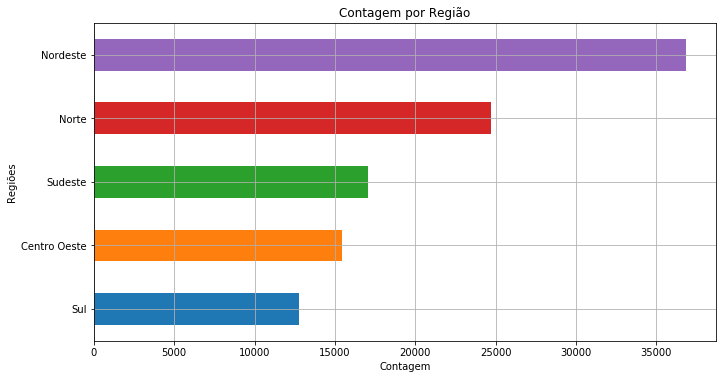

In [104]:
contagem_regiao = df_gasPricesBR.regiao.value_counts()
print(contagem_regiao)
contagem_regiao.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Contagem')
plt.ylabel('Regiões')
plt.title('Contagem por Região')
plt.show()

### Contagem por Região por Produto

regiao       Centro Oeste  Nordeste  Norte  Sudeste   Sul
produto                                                  
Diesel               3140      7065   5494     3140  2355
Diesel S10           1349      3039   2359     1352  1014
Etanol               3140      7064   5404     3140  2354
GLP                  3137      7061   5494     3139  2355
Gasolina             3140      7065   5494     3140  2355
Gás Natural          1523      5575    457     3136  2343


<Figure size 72x72 with 0 Axes>

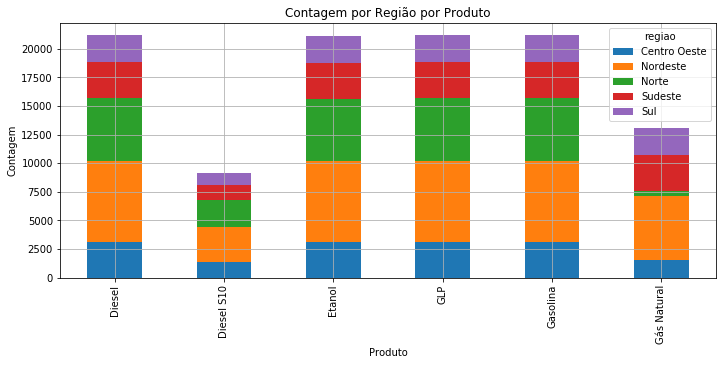

In [109]:
plt.figure(figsize=(1,1))
contagem_regiao_produto = df_gasPricesBR.groupby(['produto', 'regiao'])['preco_medio_revenda'].count()
print(contagem_regiao_produto.unstack())
contagem_regiao_produto.unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Produto')
plt.ylabel('Contagem')
plt.title('Contagem por Região por Produto')
plt.show()

### Contagem por Estado

PARAIBA                4263
BAHIA                  4263
RIO GRANDE DO SUL      4263
SAO PAULO              4263
CEARA                  4263
RIO DE JANEIRO         4263
SANTA CATARINA         4262
PERNAMBUCO             4262
RIO GRANDE DO NORTE    4262
MINAS GERAIS           4261
ESPIRITO SANTO         4260
SERGIPE                4259
PARANA                 4251
ALAGOAS                4250
MATO GROSSO DO SUL     4246
MATO GROSSO            4037
AMAZONAS               3889
GOIAS                  3663
PIAUI                  3548
MARANHAO               3499
PARA                   3497
DISTRITO FEDERAL       3483
TOCANTINS              3483
ACRE                   3480
RONDONIA               3479
RORAIMA                3471
AMAPA                  3403
Name: estado, dtype: int64


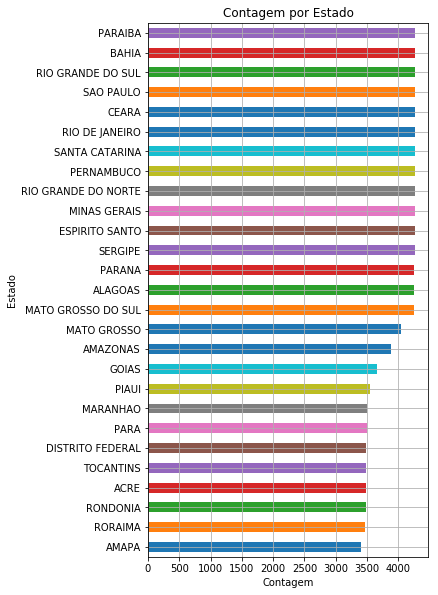

In [106]:
contagem_estado = df_gasPricesBR.estado.value_counts()
print(contagem_estado)
contagem_estado.sort_values().plot(kind='barh', figsize=(6, 8))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Contagem')
plt.ylabel('Estado')
plt.title('Contagem por Estado')
plt.show()

### Contagem por Estado por Produto

produto              Diesel  Diesel S10  Etanol    GLP  Gasolina  Gás Natural
estado                                                                       
ACRE                  785.0       336.0   784.0  785.0     785.0          5.0
ALAGOAS               785.0       337.0   785.0  784.0     785.0        774.0
AMAPA                 784.0       336.0   703.0  784.0     784.0         12.0
AMAZONAS              785.0       337.0   785.0  785.0     785.0        412.0
BAHIA                 785.0       338.0   785.0  785.0     785.0        785.0
CEARA                 785.0       338.0   785.0  785.0     785.0        785.0
DISTRITO FEDERAL      785.0       336.0   785.0  783.0     785.0          9.0
ESPIRITO SANTO        785.0       338.0   785.0  784.0     785.0        783.0
GOIAS                 785.0       338.0   785.0  784.0     785.0        186.0
MARANHAO              785.0       338.0   785.0  784.0     785.0         22.0
MATO GROSSO           785.0       337.0   785.0  785.0     785.0

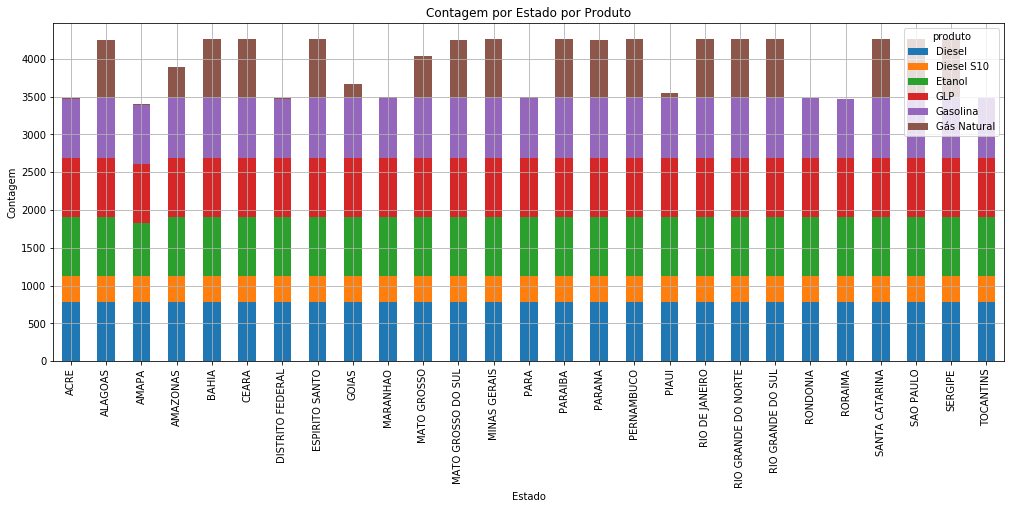

In [107]:
contagem_estado_produto = df_gasPricesBR.groupby(['estado', 'produto'])['preco_medio_revenda'].count()
print(contagem_estado_produto.unstack())
contagem_estado_produto.unstack().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.title('Contagem por Estado por Produto')
plt.show()

### Quais estados, por região, tiveram o maior aumento no preço da gasolina ?

Para iniciarmos a análise, primeiramente filtramos pela região e produto desejados, para em seguida agrupar por estado e fazer a média da coluna de preço de revenda. Para facilitar a visualização, executamos um *print* do *dataframe* montado com um *unstack()*, onde os estado viram colunas com seus valores por ano, tornando assim mais *wide* a visualização. Em seguida, executamos o *plot* para um gráfico de linhas onde é possível observar a evolução do preço da gasolina por estado através dos anos.

Para se obter o aumento percentual, utilizou-se o *dataframe* montado anteriormente e aplicou-se a fórmula para todas as colunas (estados):

</br>
</br>

\begin{align*}
( \frac{Ano Final}{Ano Inicial} - 1 ) x 100
\end{align*}

</br>
</br>

Novamente executa-se um *print* com os aumentos percentuais por estado ordenados e em seguida exibe-se o gráfico de barras horizontal onde é possível observar qual estado teve o maior aumento. O processo é análogo para todas as regiões, portanto nas próximas seções serão executados os procedimentos descritos anteriormente juntamente com a discussão dos resultados. 

#### Região Norte

Observando-se o primeiro gráfico, nota-se que o Acre tem a gasolina mais cara da região, porém ao se observar o segundo gráfico observa-se que o seu aumento percentual de 2004 à 2019 foi de apenas aproximadamente 93%, ou seja, o segundo maior da região, e que o estado de Tocantins teve um aumento de quase 100% no período, sendo esse estado o de maior aumento percentual. O estado com a gasolina mais barata e de menor aumento percentual é o Amapá.

estado      ACRE     AMAPA  AMAZONAS      PARA  RONDONIA   RORAIMA  TOCANTINS
ano                                                                          
2004    2.531853  2.385176  2.251676  2.408324  2.455412  2.149882   2.275088
2005    2.660660  2.457286  2.569900  2.463260  2.572200  2.562980   2.505860
2006    2.944623  2.581755  2.559226  2.660736  2.731208  2.855472   2.751151
2007    2.919981  2.438865  2.463500  2.633038  2.678865  2.631442   2.726615
2008    2.966423  2.614346  2.444096  2.745423  2.709019  2.691269   2.739346
2009    2.963780  2.715160  2.570160  2.757260  2.676920  2.698600   2.737060
2010    2.985692  2.848827  2.608154  2.765865  2.769308  2.833442   2.824173
2011    3.112808  2.797731  2.777423  2.818673  2.961481  2.835423   2.912385
2012    3.125302  2.707245  2.888943  2.844868  2.952075  2.867755   2.910906
2013    3.256942  2.849500  2.994077  2.984038  3.058942  3.010346   3.044846
2014    3.408154  2.966288  3.163346  3.120577  3.206096  3.0960

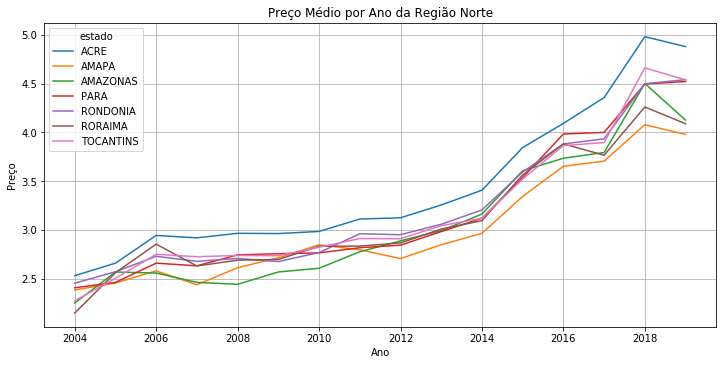

In [111]:
preco_medio_ano_estado_norte = df_gasPricesBR[(df_gasPricesBR['regiao'] == "Norte") & (df_gasPricesBR['produto'] == "Gasolina")].groupby(['ano', 'estado'])['preco_medio_revenda'].mean()
print(preco_medio_ano_estado_norte.unstack())
preco_medio_ano_estado_norte.unstack().plot(kind='line', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Preço Médio por Ano da Região Norte')
plt.show()

##### Aumento Percentual

estado
AMAPA        66.848870
AMAZONAS     83.251904
RONDONIA     84.936802
PARA         87.752183
RORAIMA      90.216920
ACRE         92.752111
TOCANTINS    99.517536
Name: preco_medio_revenda, dtype: float64


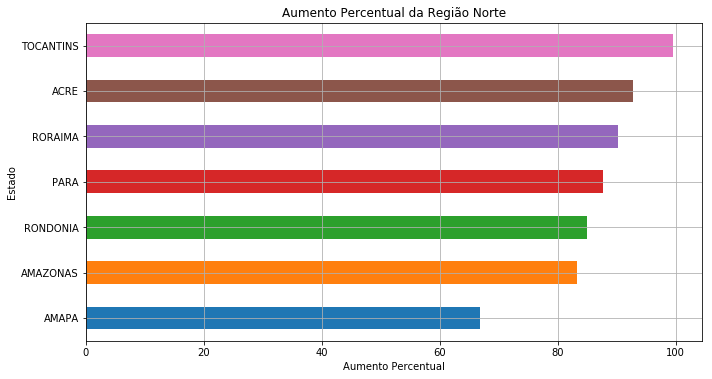

In [116]:
norte_aumento_percentual = ((preco_medio_ano_estado_norte[2019]/preco_medio_ano_estado_norte[2004])-1)*100
print(norte_aumento_percentual.sort_values())
norte_aumento_percentual.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Aumento Percentual')
plt.ylabel('Estado')
plt.title('Aumento Percentual da Região Norte')
plt.show()

#### Região Nordeste

Já para a região nordeste, os preços são bem mais parecidos e caminhando juntos. Para o ano de 2019, a gasolina mais cara é a da Bahia, com uma média de R$ 4,54. Porém, em termos de aumento percentual no período estudado, o estado que teve o maior aumento para a região foi o Sergipe com 107%, enquanto que o Ceará teve o menor com 97%.

estado   ALAGOAS     BAHIA     CEARA  MARANHAO   PARAIBA  PERNAMBUCO     PIAUI  RIO GRANDE DO NORTE   SERGIPE
ano                                                                                                          
2004    2.235294  2.224147  2.283618  2.177882  2.108382    2.151588  2.235206             2.140912  2.121676
2005    2.557120  2.375840  2.442620  2.351480  2.342880    2.368400  2.429940             2.337860  2.324360
2006    2.803189  2.643698  2.697302  2.736000  2.591868    2.639849  2.512000             2.624208  2.548170
2007    2.804462  2.612212  2.611058  2.725192  2.523462    2.599423  2.563904             2.546981  2.517308
2008    2.759981  2.616904  2.568519  2.649096  2.453231    2.596558  2.600365             2.588981  2.521404
2009    2.696820  2.636020  2.536180  2.597040  2.415200    2.570880  2.563540             2.591060  2.550200
2010    2.725538  2.714077  2.632827  2.583596  2.446212    2.615654  2.517596             2.675500  2.607712
2011    2.

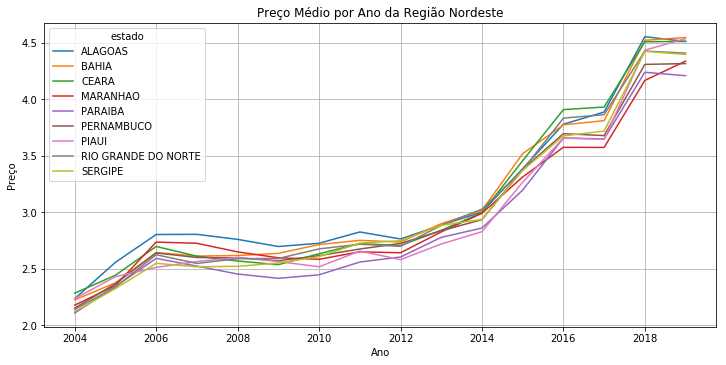

In [112]:
preco_medio_ano_estado_nordeste = df_gasPricesBR[(df_gasPricesBR['regiao'] == "Nordeste") & (df_gasPricesBR['produto'] == "Gasolina")].groupby(['ano', 'estado'])['preco_medio_revenda'].mean()
print(preco_medio_ano_estado_nordeste.unstack())
preco_medio_ano_estado_nordeste.unstack().plot(kind='line', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Preço Médio por Ano da Região Nordeste')
plt.show()

##### Aumento Percentual

estado
CEARA                   97.588244
MARANHAO                99.178803
PARAIBA                 99.618442
PERNAMBUCO             100.586707
ALAGOAS                101.856211
PIAUI                  102.984434
BAHIA                  104.434324
RIO GRANDE DO NORTE    105.940295
SERGIPE                107.226694
Name: preco_medio_revenda, dtype: float64


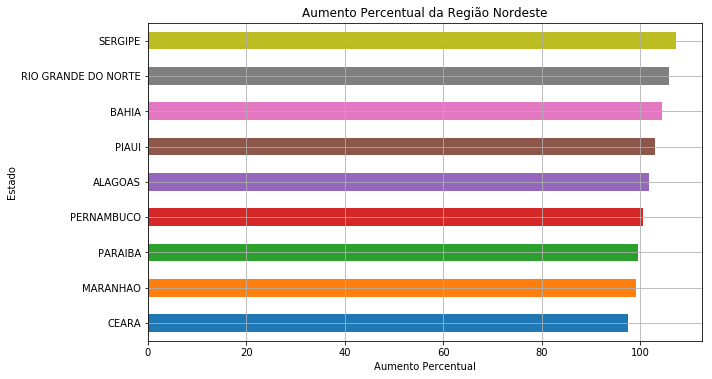

In [118]:
nordeste_aumento_percentual = ((preco_medio_ano_estado_nordeste[2019]/preco_medio_ano_estado_nordeste[2004])-1)*100
print(nordeste_aumento_percentual.sort_values())
nordeste_aumento_percentual.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Aumento Percentual')
plt.ylabel('Estado')
plt.title('Aumento Percentual da Região Nordeste')
plt.show()

#### Região Centro Oeste

Para a região centro oeste, no primeiro gráfico observa-se que o estado de Goiás tem o valor mais alto de gasolina em 2019, custando R$ 4,49. Já no segundo gráfico, o status de maior preço da região se confirma com um aumento de 108% no preço para o período estudado.

estado  DISTRITO FEDERAL     GOIAS  MATO GROSSO  MATO GROSSO DO SUL
ano                                                                
2004            2.124676  2.158882     2.541265            2.329206
2005            2.328860  2.353100     2.747860            2.561680
2006            2.596887  2.575434     2.952377            2.755321
2007            2.572481  2.524750     2.895827            2.712673
2008            2.555269  2.506115     2.753519            2.709019
2009            2.681580  2.588040     2.721800            2.663040
2010            2.713385  2.554269     2.772558            2.649038
2011            2.832115  2.851635     2.892154            2.728250
2012            2.835887  2.766528     2.969358            2.782075
2013            2.983731  2.898212     3.017865            3.002923
2014            3.124769  3.100308     3.110846            3.076481
2015            3.545961  3.411157     3.385980            3.348059
2016            3.690981  3.810596     3.719962 

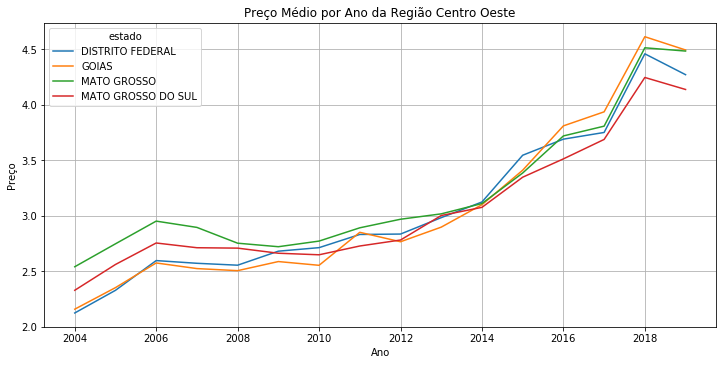

In [113]:
preco_medio_ano_estado_centroeste = df_gasPricesBR[(df_gasPricesBR['regiao'] == "Centro Oeste") & (df_gasPricesBR['produto'] == "Gasolina")].groupby(['ano', 'estado'])['preco_medio_revenda'].mean()
print(preco_medio_ano_estado_centroeste.unstack())
preco_medio_ano_estado_centroeste.unstack().plot(kind='line', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Preço Médio por Ano da Região Centro Oeste')
plt.show()

##### Aumento Percentual

estado
MATO GROSSO            76.472761
MATO GROSSO DO SUL     77.681159
DISTRITO FEDERAL      101.060258
GOIAS                 108.179941
Name: preco_medio_revenda, dtype: float64


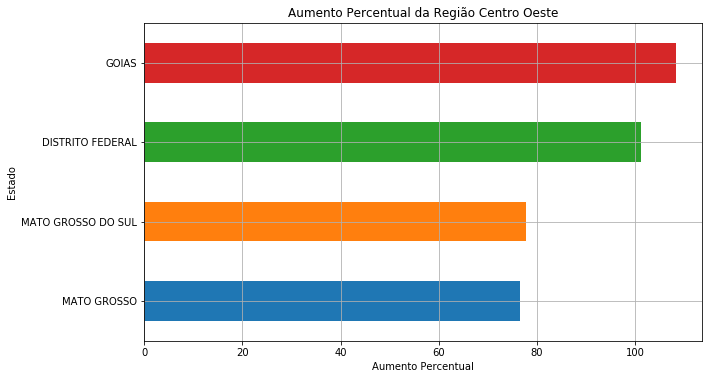

In [119]:
centroeste_aumento_percentual = ((preco_medio_ano_estado_centroeste[2019]/preco_medio_ano_estado_centroeste[2004])-1)*100
print(centroeste_aumento_percentual.sort_values())
centroeste_aumento_percentual.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Aumento Percentual')
plt.ylabel('Estado')
plt.title('Aumento Percentual da Região Centro Oeste')
plt.show()

#### Região Sudeste

Na região sudeste observa-se que no ano de 2004 os preços da gasolina dos estados eram aproximados, no entanto, em 2019 eles se espaçaram mais. Na primeira imagem nota-se que o Rio de Janeiro tem o preço médio mais alto, confirmado pelo segundo gráfico que mostra que o estado teve um aumento de 123% no período estudado, enquanto São Paulo teve o menor aumento.

estado  ESPIRITO SANTO  MINAS GERAIS  RIO DE JANEIRO  SAO PAULO
ano                                                            
2004          2.168794      2.116176        2.175500   2.047294
2005          2.360180      2.258240        2.339500   2.232900
2006          2.625925      2.488113        2.560679   2.442585
2007          2.621673      2.459096        2.532288   2.413865
2008          2.628250      2.448692        2.547308   2.402788
2009          2.630760      2.440220        2.566120   2.403000
2010          2.685981      2.515423        2.648673   2.462500
2011          2.867731      2.789308        2.835846   2.643231
2012          2.832642      2.811453        2.853698   2.636642
2013          2.892500      2.891769        2.998885   2.736404
2014          3.002346      2.976942        3.134635   2.866519
2015          3.381431      3.372255        3.549882   3.189353
2016          3.677731      3.713327        3.919192   3.499038
2017          3.777151      3.845189    

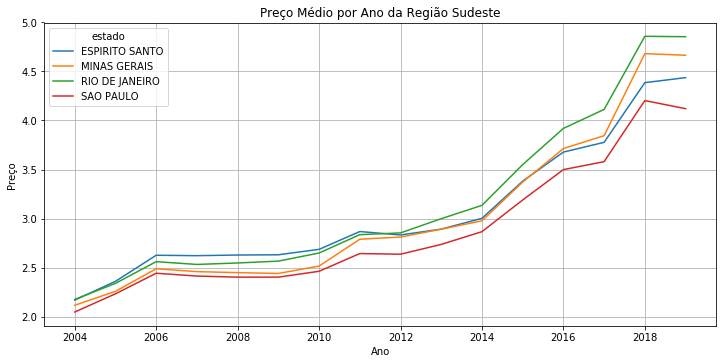

In [114]:
preco_medio_ano_estado_sudeste = df_gasPricesBR[(df_gasPricesBR['regiao'] == "Sudeste") & (df_gasPricesBR['produto'] == "Gasolina")].groupby(['ano', 'estado'])['preco_medio_revenda'].mean()
print(preco_medio_ano_estado_sudeste.unstack())
preco_medio_ano_estado_sudeste.unstack().plot(kind='line', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Preço Médio por Ano da Região Sudeste')
plt.show()

##### Aumento Percentual

estado
SAO PAULO         101.264682
ESPIRITO SANTO    104.570824
MINAS GERAIS      120.442863
RIO DE JANEIRO    123.113767
Name: preco_medio_revenda, dtype: float64


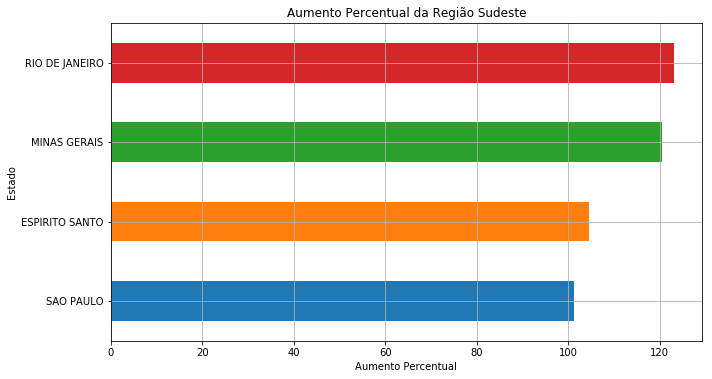

In [120]:
sudeste_aumento_percentual = ((preco_medio_ano_estado_sudeste[2019]/preco_medio_ano_estado_sudeste[2004])-1)*100
print(sudeste_aumento_percentual.sort_values())
sudeste_aumento_percentual.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Aumento Percentual')
plt.ylabel('Estado')
plt.title('Aumento Percentual da Região Sudeste')
plt.show()

#### Região Sul

Para a região sudeste, o estado do Rio Grande do Sul manteve a liderança de preço médio mais alto durante o período estudado, porém, em meados de 2014 aparentemente os preços se aproximaram bastante. Em 2019, nota-se no segundo gráfico que o Rio Grande do Sul teve o maior aumento com 97%, seguido por Paraná com 96% e Santa Catarina com 84%.

estado    PARANA  RIO GRANDE DO SUL  SANTA CATARINA
ano                                                
2004    2.129824           2.296324        2.225088
2005    2.291880           2.575080        2.426760
2006    2.501623           2.723717        2.573547
2007    2.438462           2.562288        2.541865
2008    2.413154           2.567885        2.536173
2009    2.472000           2.555700        2.535320
2010    2.528731           2.602635        2.576462
2011    2.678442           2.755192        2.725596
2012    2.686943           2.759547        2.720868
2013    2.838000           2.868058        2.851058
2014    2.951942           2.962346        2.957058
2015    3.294235           3.359196        3.257176
2016    3.632154           3.873538        3.518135
2017    3.690660           3.918113        3.667849
2018    4.277077           4.593769        4.109327
2019    4.189280           4.535280        4.105720


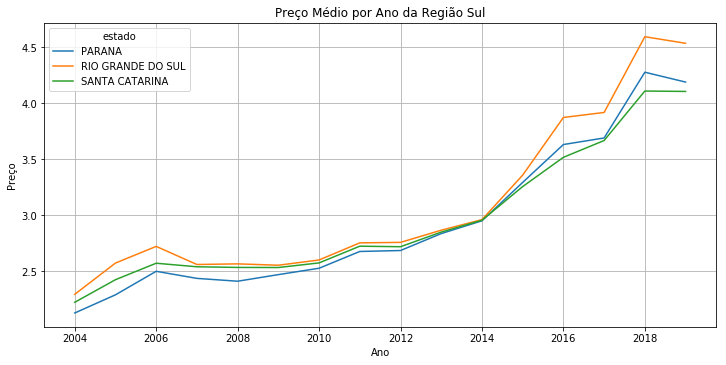

In [115]:
preco_medio_ano_estado_sul = df_gasPricesBR[(df_gasPricesBR['regiao'] == "Sul") & (df_gasPricesBR['produto'] == "Gasolina")].groupby(['ano', 'estado'])['preco_medio_revenda'].mean()
print(preco_medio_ano_estado_sul.unstack())
preco_medio_ano_estado_sul.unstack().plot(kind='line', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.title('Preço Médio por Ano da Região Sul')
plt.show()

##### Aumento Percentual

estado
SANTA CATARINA       84.519424
PARANA               96.696108
RIO GRANDE DO SUL    97.501787
Name: preco_medio_revenda, dtype: float64


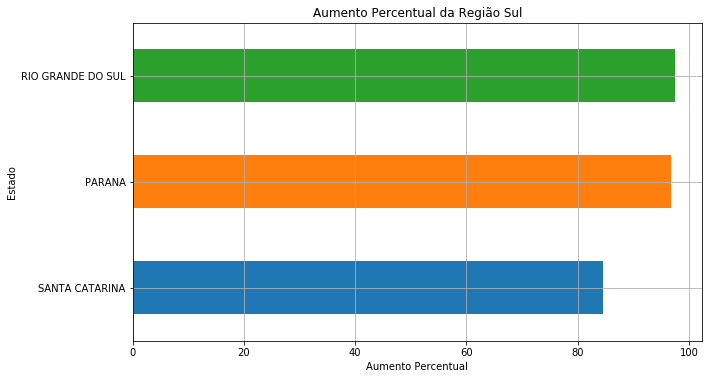

In [121]:
sul_aumento_percentual = ((preco_medio_ano_estado_sul[2019]/preco_medio_ano_estado_sul[2004])-1)*100
print(sul_aumento_percentual.sort_values())
sul_aumento_percentual.sort_values().plot(kind='barh', figsize=(10, 5))
plt.tight_layout()
plt.grid(True)
plt.xlabel('Aumento Percentual')
plt.ylabel('Estado')
plt.title('Aumento Percentual da Região Sul')
plt.show()

## Conclusão

## Referências

- http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis
- https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil    